## Approximating a Solution to the 1D parabolic Equation for Different Constants '\kappa' > 0

Consider the 1D parabolic equation

\begin{equation}
    u_t = u_{xx} - \kappa^2 u \quad \textrm{ for } x \in \left( -1, 2 \right), t \in \left( 0, T \right),
\end{equation}

subject to an initial condition

\begin{equation}
    u \left( x, t = 0 \right) = \sin \left( \kappa x \right) + 2 \sin \left( 2 \kappa x \right)
\end{equation}

and homogeneous Dirichlet boundary conditions

\begin{equation}
  u \left( x = -1, t \right) = u \left( x = 2, t \right) = 0
\end{equation}

such that the analytical solution is 

\begin{equation}
u \left( x, t \right) = e^{-2 \kappa^2 t} \sin \left( \kappa x \right) + 2 e^{-5 \kappa^2 t}\sin \left( 2 \kappa x \right)
\end{equation}

C:\Users\alann\AppData\Local\Temp\ipykernel_47372\3951791513.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.int(np.floor(T/dt))


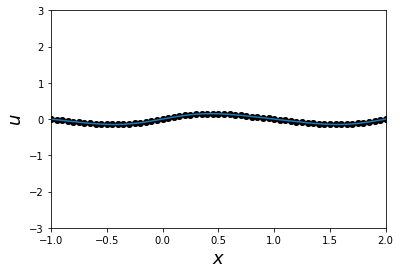

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# constant
c = 1*np.pi
# The grid spacing in the x-dimension
dx = 0.05
# The x-dimension grid locations
x = np.arange(-1, 2 + dx, dx)
# The number of x-dimension grid divisions
M = np.size(x)-1
# The time step size
dt = 0.0025
# The time integration length
T = 0.1
# The number of timesteps
N = np.int(np.floor(T/dt))

# the first index is space and the second time
U = np.zeros((M+1,N+1))
U_exact = np.zeros((M+1,N+1))

# The initial condition
U[1:M+1,0] = np.sin(c*x[1:M+1]) + 2*np.sin(2*c*x[1:M+1])
U_exact[1:M+1,0] = np.sin(c*x[1:M+1]) + 2*np.sin(2*c*x[1:M+1])
# enforcing the boundary condition
U[0,0] = 0 
U[-1,0] = 0 

# Form matrices which apply to the MOL method
mu = dt/dx**2
A_1 = np.diagflat((1+mu+dt*(c)**2/2)*np.ones(M-1))+np.diagflat((-mu/2)*np.ones(M-2),1)+np.diagflat((-mu/2)*np.ones(M-2),-1)
A_1_inv = np.linalg.inv(A_1)
A_2 = np.diagflat((1-mu-dt*(c)**2/2)*np.ones(M-1))+np.diagflat((mu/2)*np.ones(M-2),1)+np.diagflat((mu/2)*np.ones(M-2),-1)

for n in range(N):
    # enforcing the boundary condition
    U[0,n+1] = 0
    U[-1,n+1] = 0
    # A single Crank-Nicolson timestep
    U[1:M,n+1] = np.dot(A_1_inv,np.dot(A_2,U[1:M,n]))
    # exact solution
    U_exact[:,n+1] = np.exp(-2*((c)**2)*(n+1)*dt)*np.sin(c*x)+2*np.exp(-5*((c)**2)*(n+1)*dt)*np.sin(2*c*x);  

# Gather the data
# Numerical solution data
data_ = U[:, :-1] 
# Exact solution data
data_exact = U_exact[:, 1:] 


#plotting    
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([-1,2,-3,3])
l, = ax.plot([],[],'ok')
m, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x, U_exact[:,i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N)

from IPython.display import HTML
HTML(ani.to_jshtml())

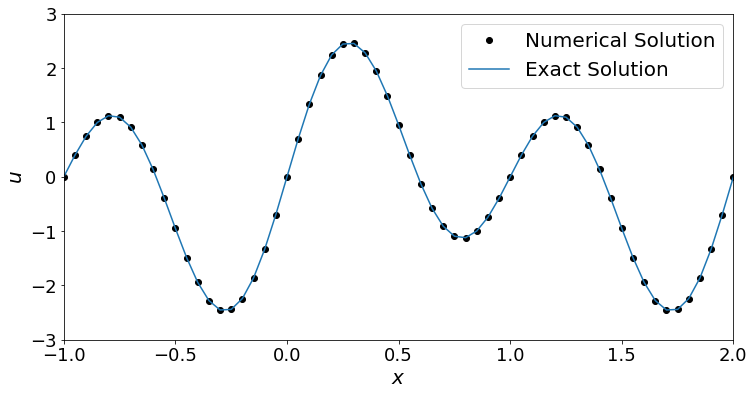

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Creating plots PER STEP

# let n = time step we wish to capture
n=1

# figure size
plt.figure(figsize=(12, 6))

# figure labels    
plt.xlabel(r'$x$',  fontsize= 20,fontweight='bold')
plt.ylabel(r'$u$',  fontsize= 20,fontweight='bold')
plt.axis([-1,2,-3,3])

# plotting both solutions
plt.plot(x, U[:, n], 'ok', label='Numerical Solution')
plt.plot(x, U_exact[:, n], label='Exact Solution')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
# save the figure
#plt.savefig('FD_para1_0.0001.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


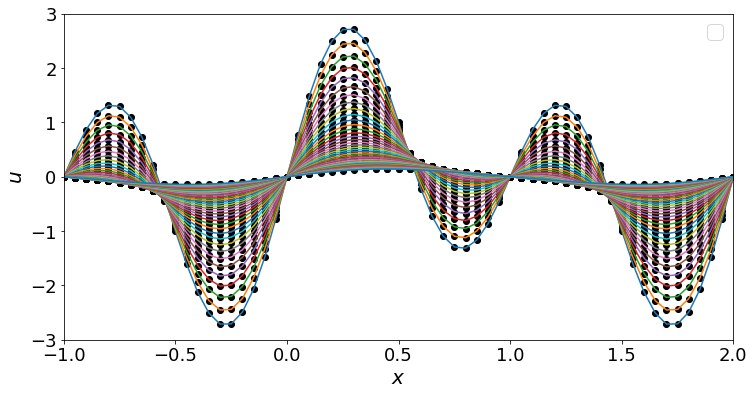

In [4]:
# plot for the COMPUTED and EXACT solution

# figure size
plt.figure(figsize=(12, 6))

# figure labels    
plt.xlabel(r'$x$',  fontsize= 20,fontweight='bold')
plt.ylabel(r'$u$',  fontsize= 20,fontweight='bold')
plt.axis([-1,2,-3,3])

# plotting both solutions
plt.plot(x, U, 'ok')
plt.plot(x, U_exact)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)

# save the figure
plt.savefig('num_exact_para.png')
plt.show()

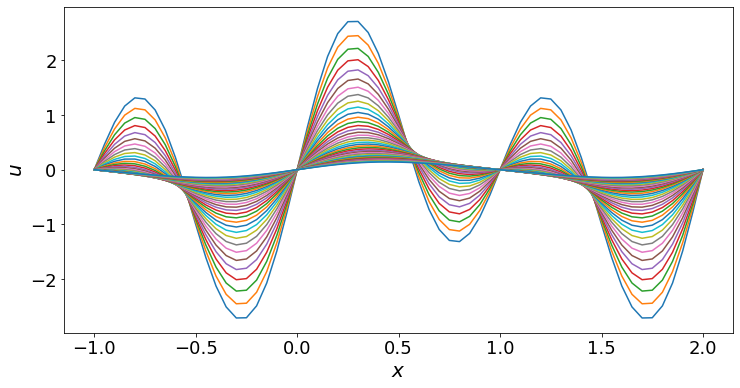

In [23]:
# plot for the EXACT solution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(x, U_exact)
#plt.plot(x, U , label='Numerical Solution')
plt.xlabel(r'$x$', fontsize= 20,fontweight='bold')
plt.ylabel(r'$u$', fontsize= 20,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('EXACT_para.png')
plt.show()


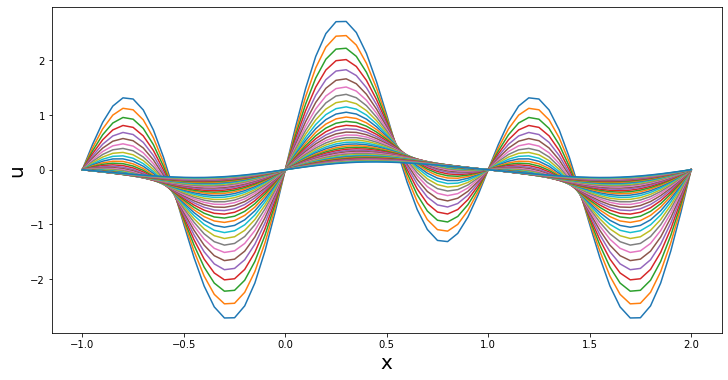

In [5]:
# plot for the COMPUTED solution

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
#plt.plot(x, U_exact)
plt.plot(x, U , label='Numerical Solution')
plt.xlabel('x', fontsize=20)
plt.ylabel('u', fontsize=20)
plt.savefig('FD_para.png')
plt.show()

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation
'''Same code as before, purpose is to generate data required to apply to FNO later'''


# List of values for n
n_values = np.arange(2, 34)
# specifies which folder we want data to go to 
folder_path = 'C:/Users/alann/Desktop/Dissertation code/pifno2/data/rdmdata'  

for i in n_values:
    # value for constant
    c = i * np.pi

    # The grid spacing in the x-dimension
    dx = 0.05

    # The x-dimension grid locations
    x = np.arange(-1, 2 + dx, dx)

    # The number of x-dimension grid divisions
    M = np.size(x)-1

    # The time step size
    dt = 0.0025

    # The time integration length
    T = 0.1
    
    # The number of timesteps
    N = np.int(np.floor(T/dt))

    # Define the numerical solution
    U = np.zeros((M + 1, N + 1))
    U_exact = np.zeros((M + 1, N + 1))

    # Initial condition
    U[1:M + 1, 0] = np.sin(c * x[1:M + 1]) + 2 * np.sin(2 * c * x[1:M + 1])
    U_exact[1:M + 1, 0] = np.sin(c * x[1:M + 1]) + 2 * np.sin(2 * c * x[1:M + 1])
    U[0, 0] = 0
    U[-1, 0] = 0

    # Form matrices for the Crank Method
    mu = dt / dx ** 2
    A_1 = np.diagflat((1 + mu + dt * (c) ** 2 / 2) * np.ones(M - 1)) + np.diagflat((-mu / 2) * np.ones(M - 2), 1) + np.diagflat((-mu / 2) * np.ones(M - 2), -1)
    A_1_inv = np.linalg.inv(A_1)
    A_2 = np.diagflat((1 - mu - dt * (c) ** 2 / 2) * np.ones(M - 1)) + np.diagflat((mu / 2) * np.ones(M - 2), 1) + np.diagflat((mu / 2) * np.ones(M - 2), -1)

    for n in range(N):
        U[0, n + 1] = 0
        U[-1, n + 1] = 0
        U[1:M, n + 1] = np.dot(A_1_inv, np.dot(A_2, U[1:M, n]))
        U_exact[:, n + 1] = np.exp(-2 * ((c) ** 2) * (n + 1) * dt) * np.sin(c * x) + 2 * np.exp(-5 * ((c) ** 2) * (n + 1) * dt) * np.sin(2 * c * x)

    # Gather the data
    # Numerical solution data
    data_ = U[:, :-1]  
    # Exact solution data
    data_exact = U_exact[:, 1:] 
    '''
    # Save the data to a .npy file
    filename = f"rdm_exact_{i}.npy"
    

    # Create the full file path by joining the folder path and filename
    file_path = os.path.join(folder_path, filename)

    np.save(file_path, data_exact)
    
    
    # Plotting and animation
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel('$u$', fontsize=18)
    ax.axis([-1, 2, -3, 3])
    l, = ax.plot([], [], 'ok')
    m, = ax.plot([], [])

    def animate(i):
        l.set_data(x, U[:, i])
        m.set_data(x, U_exact[:, i])

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N)
    '''

### Calculating the errors associated with the parabolic equation for different error metrics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import time

## ====== setting parameters =======
# The grid spacing in the x-dimension
dx_vec = np.array([0.04,0.02, 0.01,0.005,0.0025,0.001])
max_norm2 = np.zeros_like(dx_vec);
max_norm2_dx = np.zeros_like(dx_vec);
fin_mse = np.zeros_like(dx_vec);
fin_mae = np.zeros_like(dx_vec);

for i, dx in enumerate(dx_vec):
    t1 = time.time()
    c = np.pi
    # The x-dimension grid locations
    x = np.arange(0, 1 + dx, dx)
    # The number of x-dimension grid divisions
    M = np.size(x)-1;
    # The time step size
    dt = 0.25*dx;
    # The time integration length
    T = 0.01;
    # The number of timesteps
    N = np.int(np.floor(T/dt))

    # Define the numerical solution 
    # the first index is space and the second time
    U = np.zeros((M+1,N+1))
    e_n = np.zeros((M+1))

    # The initial condition
    U[:,0] = np.sin(c * x) + 2 * np.sin(2 * c * x);
    Uexact = np.sin(c * x) + 2 * np.sin(2 * c * x);

    # enforcing the boundary condition
    U[0,0] = 0 
    U[-1,0] = 0 

    # Form matrices for the MOL method
    mu = dt / dx ** 2
    A_1 = np.diagflat((1 + mu + dt * (c) ** 2 / 2) * np.ones(M - 1)) + np.diagflat((-mu / 2) * np.ones(M - 2), 1) + np.diagflat((-mu / 2) * np.ones(M - 2), -1)
    A_1_inv = np.linalg.inv(A_1)
    A_2 = np.diagflat((1 - mu - dt * (c) ** 2 / 2) * np.ones(M - 1)) + np.diagflat((mu / 2) * np.ones(M - 2), 1) + np.diagflat((mu / 2) * np.ones(M - 2), -1)

    # define norm vectors
    norm2 = np.zeros(N+1)
    norm2_dx = np.zeros(N+1)
    MSE = np.zeros(N+1)
    MAE = np.zeros(N+1)
    t2 = time.time()  # Record end time
    elapsed_time = t2 - t1
    
    print(f"Iteration {i}: Computation Time = {elapsed_time:.19f} seconds")
    
    for n in range(N):
        # enforcing the boundary condition
        U[0,n+1] = 0 
        U[-1,n+1] = 0 
        # A single Crank-Nicolson timestep
        U[1:M,n+1] = np.dot(A_1_inv,np.dot(A_2,U[1:M,n]))
        # exact solution 
        Uexact[:] = np.exp(-2 * ((c) ** 2) * (n + 1) * dt) * np.sin(c * x) + 2 * np.exp(-5 * ((c) ** 2) * (n + 1) * dt) * np.sin(2 * c * x);
        #  calculate the error at each time step
        e_n[:] = U[:,n+1]-Uexact[:]
        MSE[n+1] = (1/N)*(np.sum(e_n)**2)
        MAE[n+1] = (1/N)*(np.sum(np.abs(e_n)))
        norm2[n+1] = np.sqrt(np.sum(e_n**2))
        norm2_dx[n+1] = np.sqrt(dx*np.sum(e_n**2)) 

    max_norm2[i] = np.max(norm2)
    max_norm2_dx[i] = np.max(norm2_dx)
    fin_mse[i] = np.max(MSE)
    fin_mae[i] = np.max(MAE)
print(f'MSE = {fin_mse}')
print(f'MAE = {fin_mae}')
print(f'max_norm2 = {max_norm2}')
print(f'max_norm2_dx = {max_norm2_dx}')
  

Iteration 0: Computation Time = 0.0069935321807861328 seconds
Iteration 1: Computation Time = 0.0012896060943603516 seconds
Iteration 2: Computation Time = 0.0000000000000000000 seconds
Iteration 3: Computation Time = 0.0026938915252685547 seconds
Iteration 4: Computation Time = 0.0075893402099609375 seconds
Iteration 5: Computation Time = 0.1305181980133056641 seconds
MSE = [4.48838968e-05 5.58165090e-06 6.96811796e-07 8.70735706e-08
 1.08833253e-08 6.96515901e-10]
MAE = [1.58285322e-01 3.88178812e-02 9.65866547e-03 2.41186367e-03
 6.02786197e-04 9.64379924e-05]
max_norm2 = [0.03524003 0.01220585 0.00429374 0.00151616 0.00053588 0.00013556]
max_norm2_dx = [7.04800517e-03 1.72616803e-03 4.29373707e-04 1.07208980e-04
 2.67938589e-05 4.28664166e-06]


C:\Users\alann\AppData\Local\Temp\ipykernel_51444\4005506183.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N = np.int(np.floor(T/dt))
